# 08wk-1: 에너지사용량 시각화

최규빈  
2023-10-23

# 1. 강의영상

[????](????)

# 2. Imports

In [18]:
import pandas as pd 
import numpy as np
from plotnine import *

# 3. 예비학습

## A. `pd.concat()`

`# 예시1` – 위아래로

In [9]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'A':[-1,-2,-3],'B':[-2,-3,-4]})

In [16]:
display("df1",df1)
display("df2",df2)

In [23]:
#pd.concat([df1,df2],axis=0) # (3,2) concat (3,2) -> (6,4) 
pd.concat([df1,df2])

인덱스를 재정리하고 싶다면?

In [25]:
pd.concat([df1,df2]).reset_index(drop=True)

`#`

`# 예시2` – 좌우로

In [26]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'C':[-1,-2,-3],'D':[-2,-3,-4]})

In [27]:
display("df1",df1)
display("df2",df2)

In [32]:
pd.concat([df1,df2],axis=1) # (3,2) concat (3,2) -> (3,4) 

`#`

## B. `pd.merge()`

In [33]:
big = pd.DataFrame({'department':['A','A','B','B'], 'gender':['male','female','male','female'],'count':[1,2,3,1]})
small = pd.DataFrame({'department':['A','B'], 'total':[3,4]})

In [34]:
display("big",big)
display("small",small)

In [37]:
big.merge(small)

In [38]:
small.merge(big)

## C. `.applymap()`

`# 예시1`

In [39]:
np.random.seed(43052)
df = pd.DataFrame({'A':np.random.rand(3), 'B':np.random.rand(3)})
df

In [44]:
df.applymap(lambda x:'Yes' if x>0.5 else 'No')

/tmp/ipykernel_3461069/499231565.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

`#`

## D. `df.astype()`

`-` 예시1

In [48]:
df = pd.DataFrame({'A':[0,1,2],'B':[4,5,6]})
df

In [49]:
df.astype(float)

## E. 제 아픈기억

`# 예제1` – object형은 일괄적으로 문자형임을 의미하는게 아님

In [50]:
np.random.seed(43052)
df = pd.DataFrame({'A':['1','2','0','1',2], 'B':['2','3','0','0',0]})
df

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       5 non-null      object
 1   B       5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes

In [57]:
df.A[0],df.A[4],df.B[0],df.B[4]

`#`

`# 예제2` – column이름이 이상하게 들어가 있는 경우가 있음.

In [70]:
df = pd.DataFrame({('A',''):[0,0,0], ('B',''):[1,1,1]})
df

In [71]:
df['A']

In [326]:
df[('A','')]

`#`

# 4. 에너지사용량 시각화

아래는 2019년 서울의 에너지사용량을 불러오는 예시코드이다.

In [75]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러
지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.

    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
    ...
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv

아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을
이용하여 하나의 df로 합쳐라.

In [77]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

올바르게 정리된 데이터프레임의 예시는 아래와 같다.

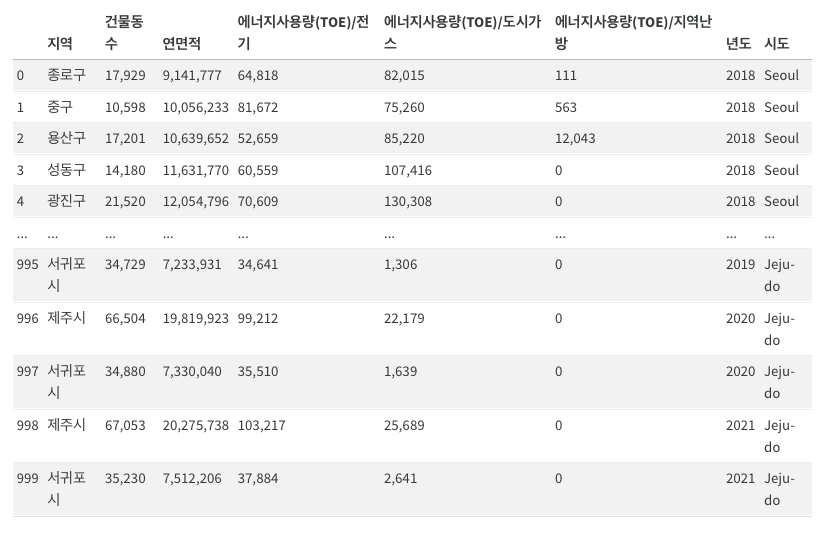

(풀이)

In [97]:
df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y,시도=p) for y in ['2018','2019','2020','2021'] for p in prov]).reset_index(drop=True)
df 

`(2)` 의미상 숫자형이지만 문자형으로 입력이된 자료를 모두 전처리하라.

(풀이)

In [131]:
df.assign(년도 = df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index()

/tmp/ipykernel_3461069/847505444.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

`(3)` 열의 이름을 아래와 같이 바꾸라.

In [174]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

(풀이)

In [134]:
df.assign(년도 = df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index().rename(name_dict,axis=1)

/tmp/ipykernel_3461069/1695199233.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

`(4)` 아래와 같은 그림을 시각화 하라.

In [365]:
# 시각화예시

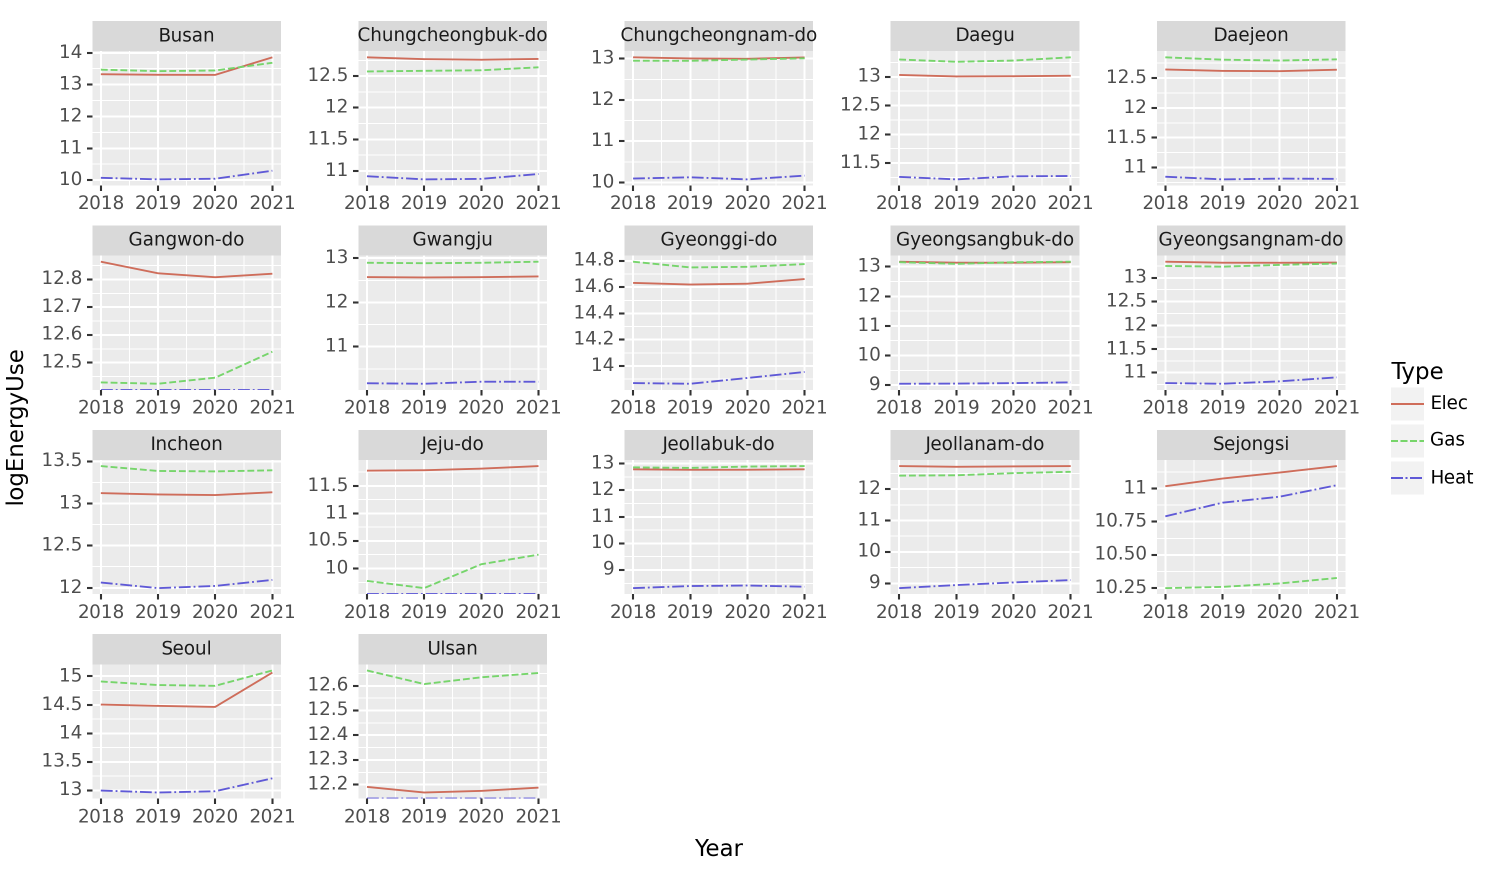

(풀이)

/tmp/ipykernel_3461069/2236388880.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log

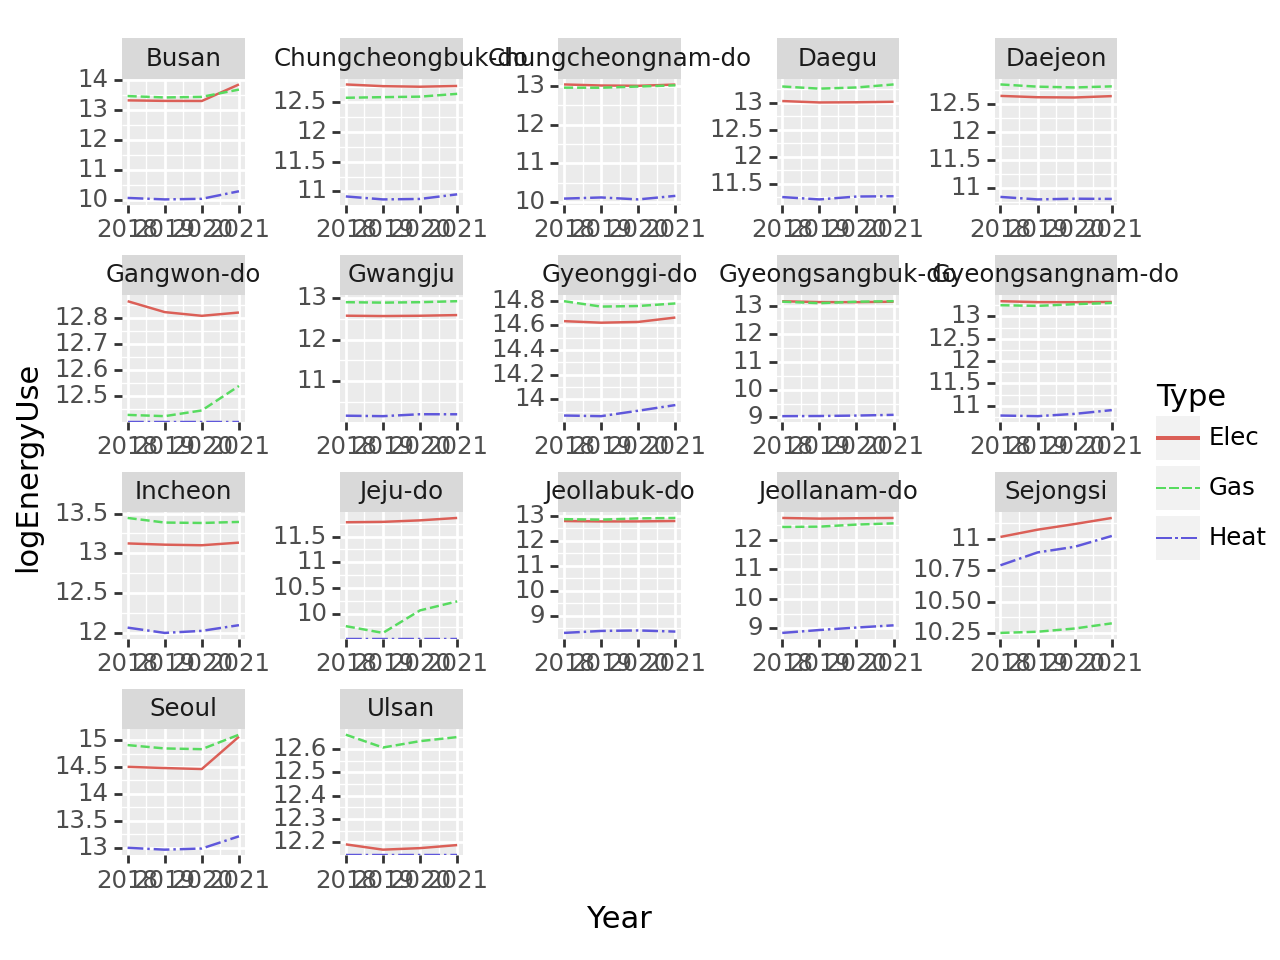

In [161]:
tidydata = df.assign(년도 = df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index().rename(name_dict,axis=1)\
.drop(['BldgCount','Area'],axis=1)\
.set_index(['Year','Prov','Reg']).stack().reset_index()\
.rename({'level_3':'Type',0:'EnergyUse'},axis=1)\
.pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum')\
.reset_index()\
.eval('logEnergyUse = log(EnergyUse)')
tidydata 
# --- # 
fig = ggplot(tidydata) 
line = geom_line(aes(x='Year',y='logEnergyUse',color='Type',linetype='Type'))
fig = (fig + line + facet_wrap('Prov',scales='free')).draw()
fig 

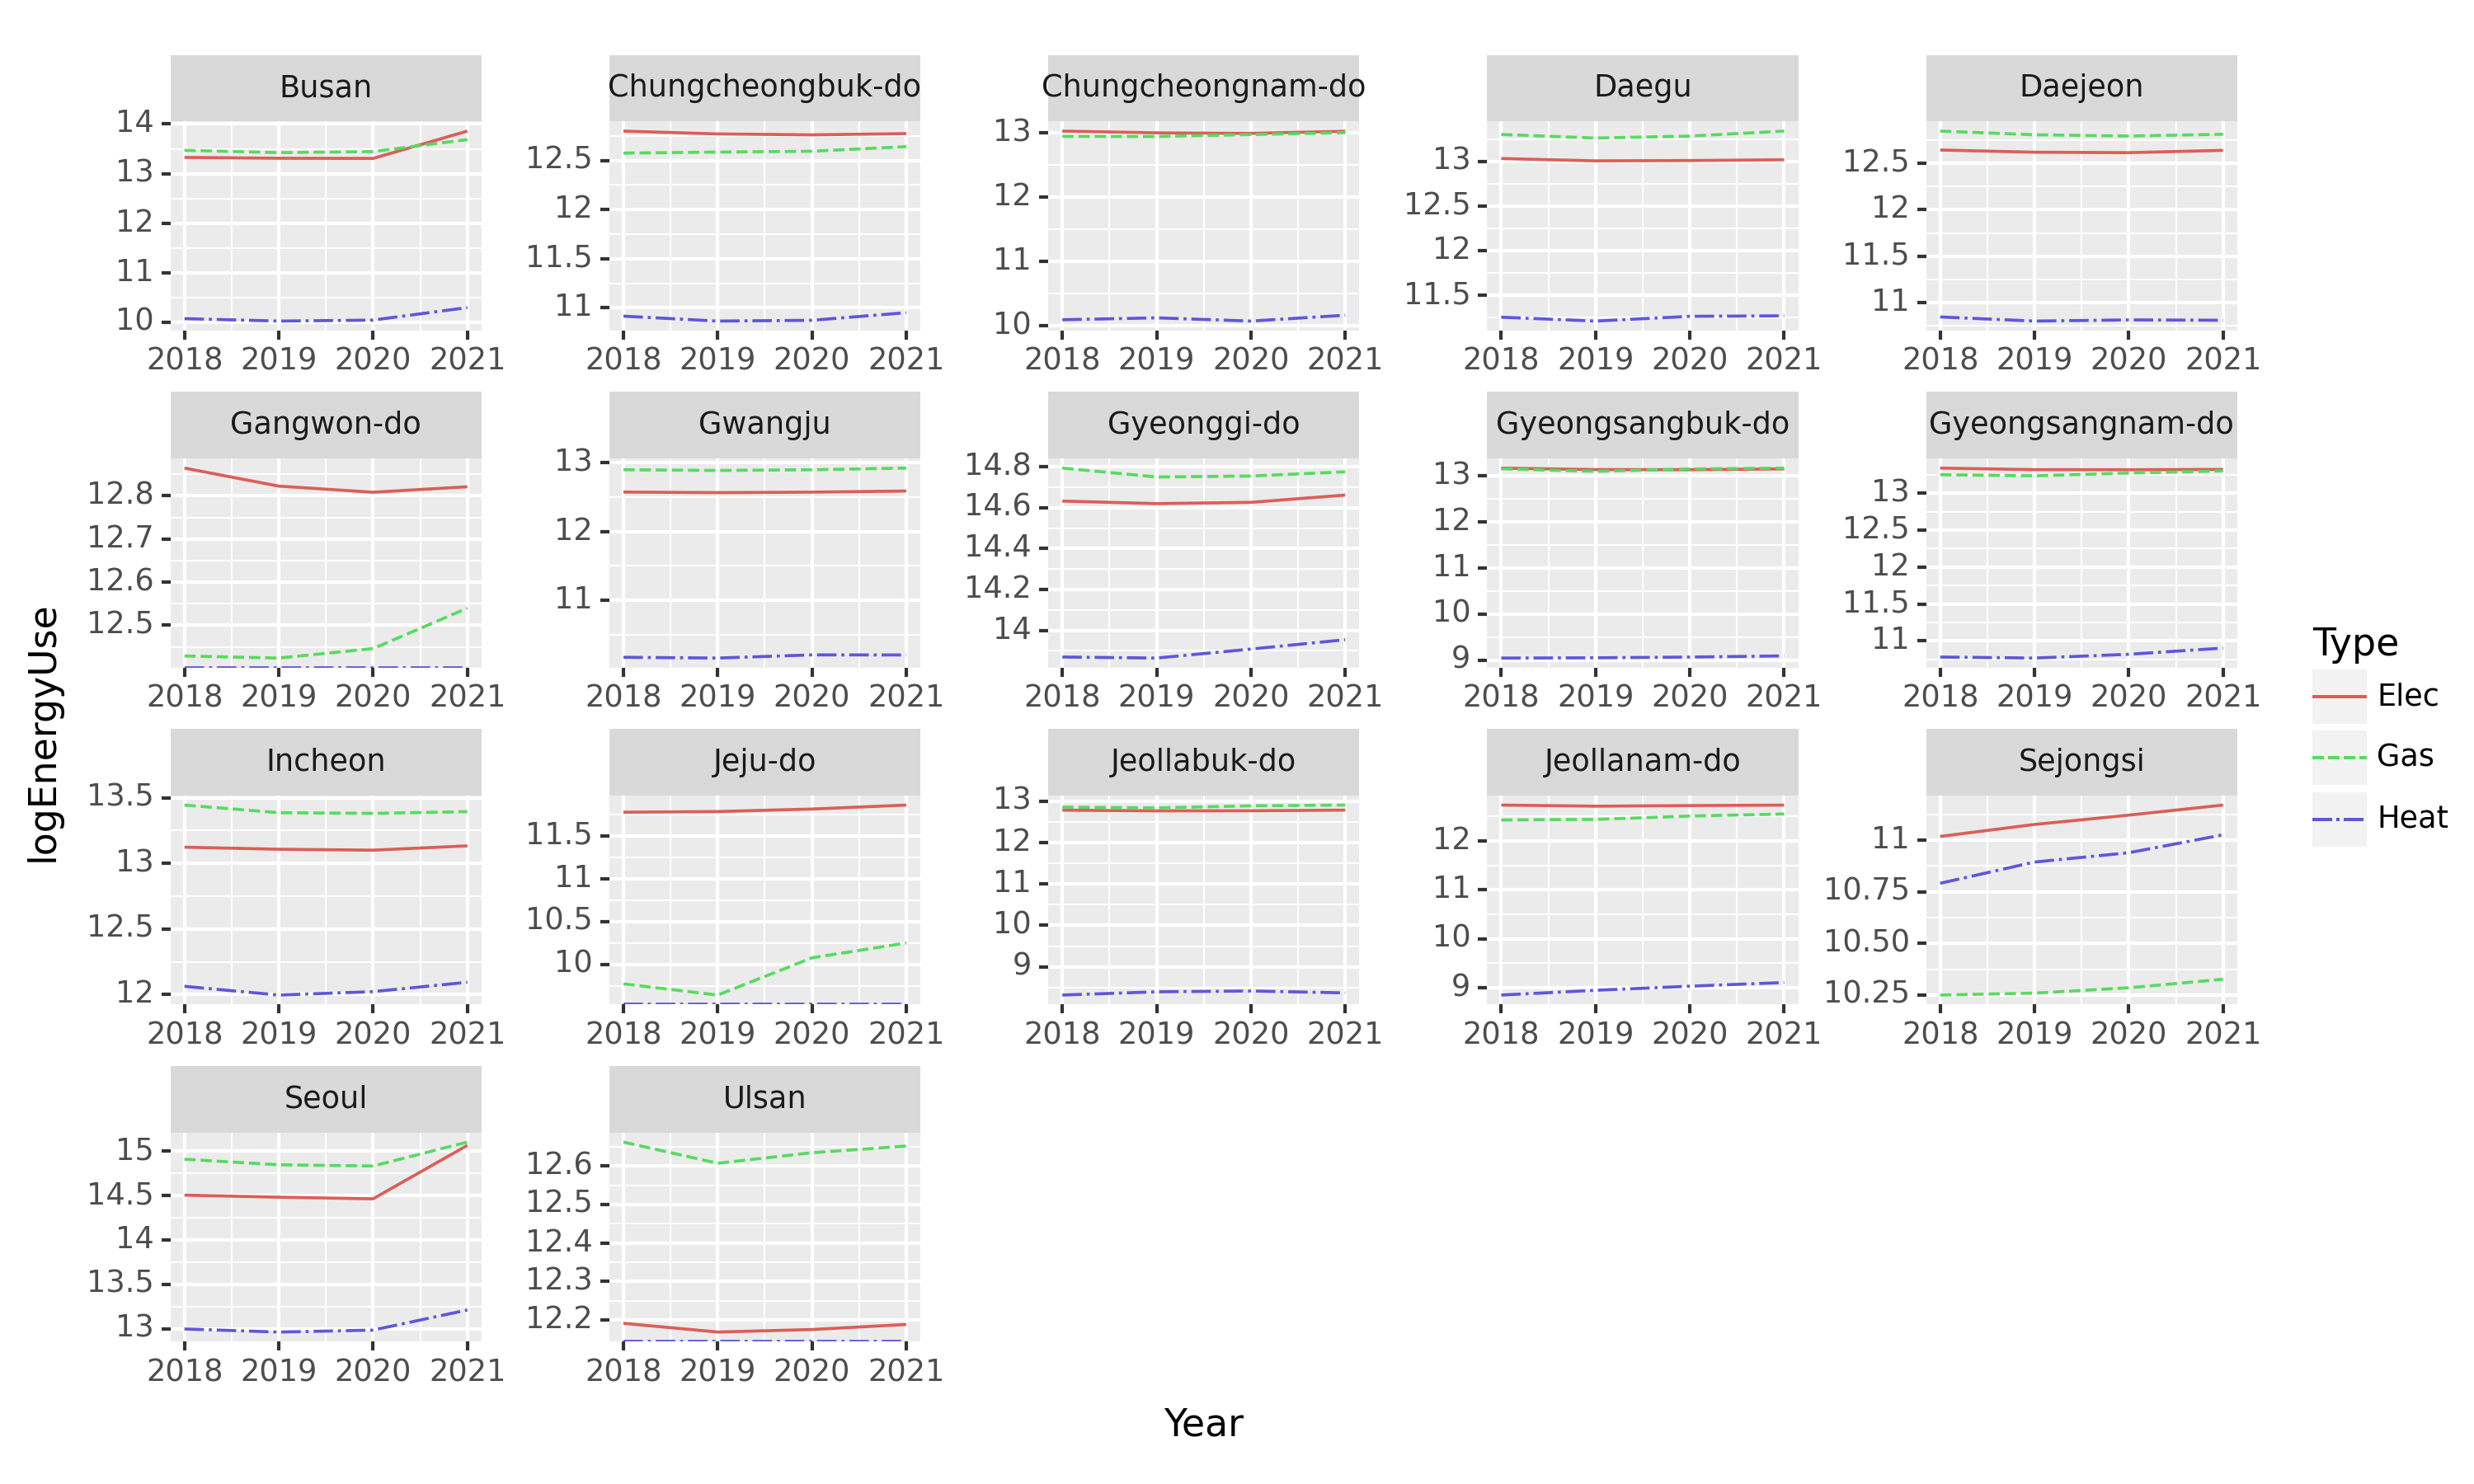

In [169]:
fig.set_size_inches(10,6)
fig.set_dpi(150)
fig

`(5)` `Prov`별로 총 에너지사용량이 많은 상위5개의 `Reg`을 찾고 아래와
같이 시각화 하라.

In [366]:
# 시각화예시

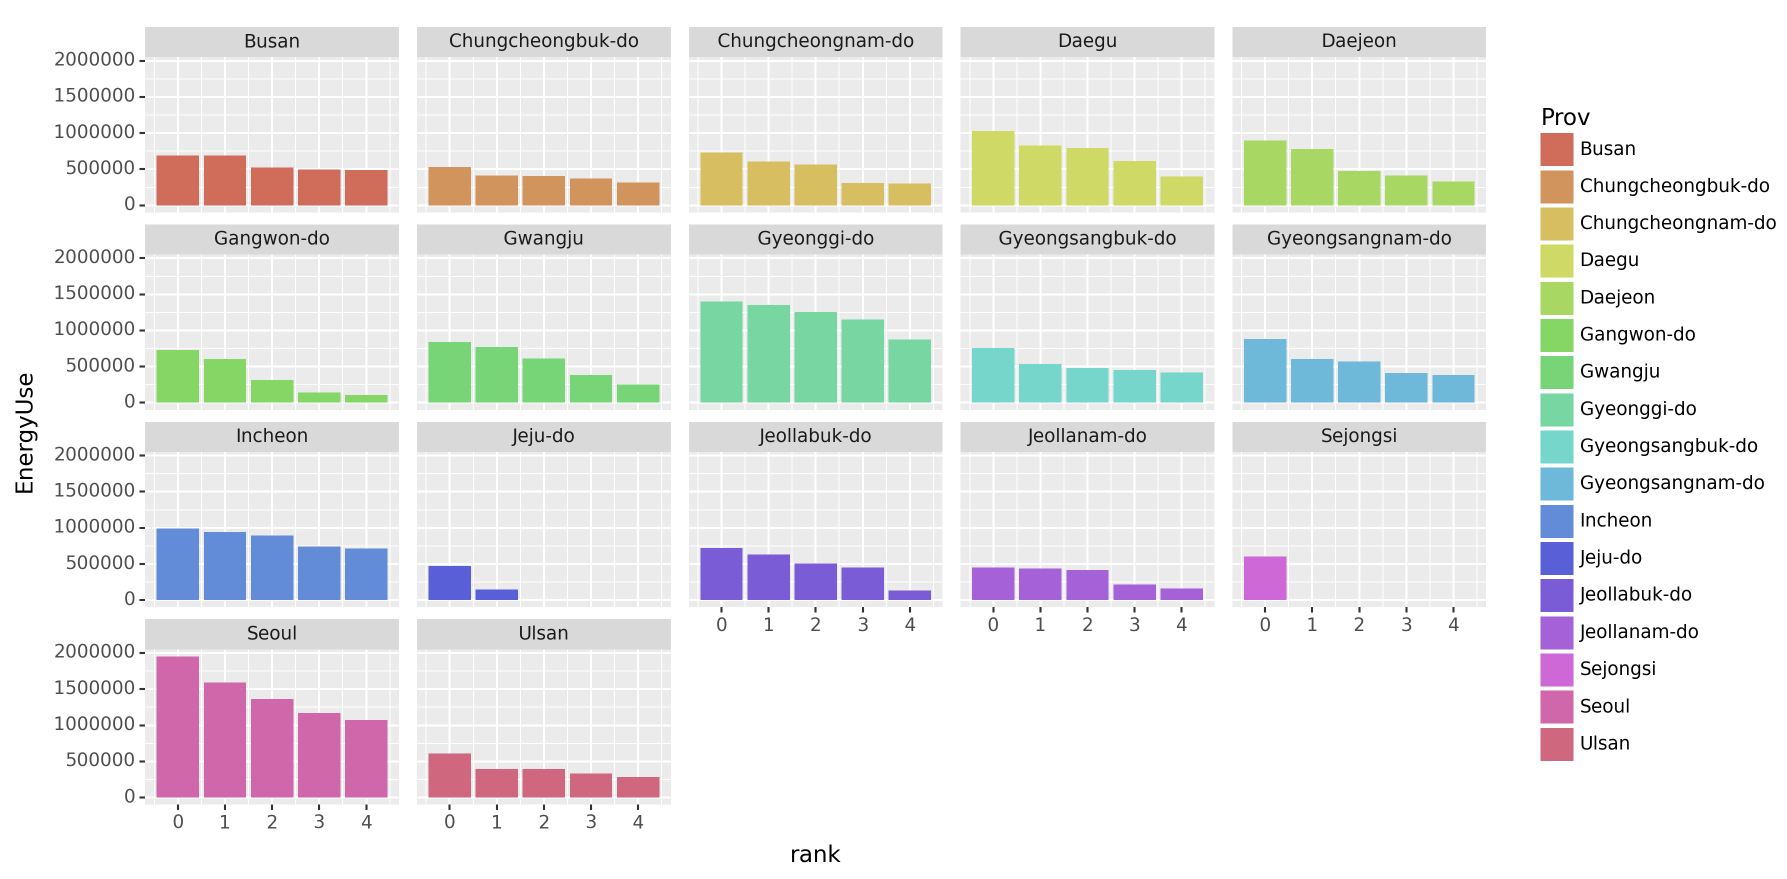

(풀이)

In [183]:
df.assign(년도 = df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index().rename(name_dict,axis=1)\
.eval('EnergyUse = Elec + Gas + Heat')\
.drop(['BldgCount','Area','Elec','Gas','Heat'],axis=1)\
.pivot_table(index=['Prov','Reg'],columns='Year',values='EnergyUse').sum(axis=1)\
.reset_index().rename({0:'EnergyUse'},axis=1)

/tmp/ipykernel_3461069/1149148944.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

In [185]:
g = df.assign(년도 = df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index().rename(name_dict,axis=1)\
.eval('EnergyUse = Elec + Gas + Heat')\
.drop(['BldgCount','Area','Elec','Gas','Heat'],axis=1)\
.pivot_table(index=['Prov','Reg'],columns='Year',values='EnergyUse').sum(axis=1)\
.reset_index().rename({0:'EnergyUse'},axis=1)\
.groupby('Prov')

/tmp/ipykernel_3461069/1748878604.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

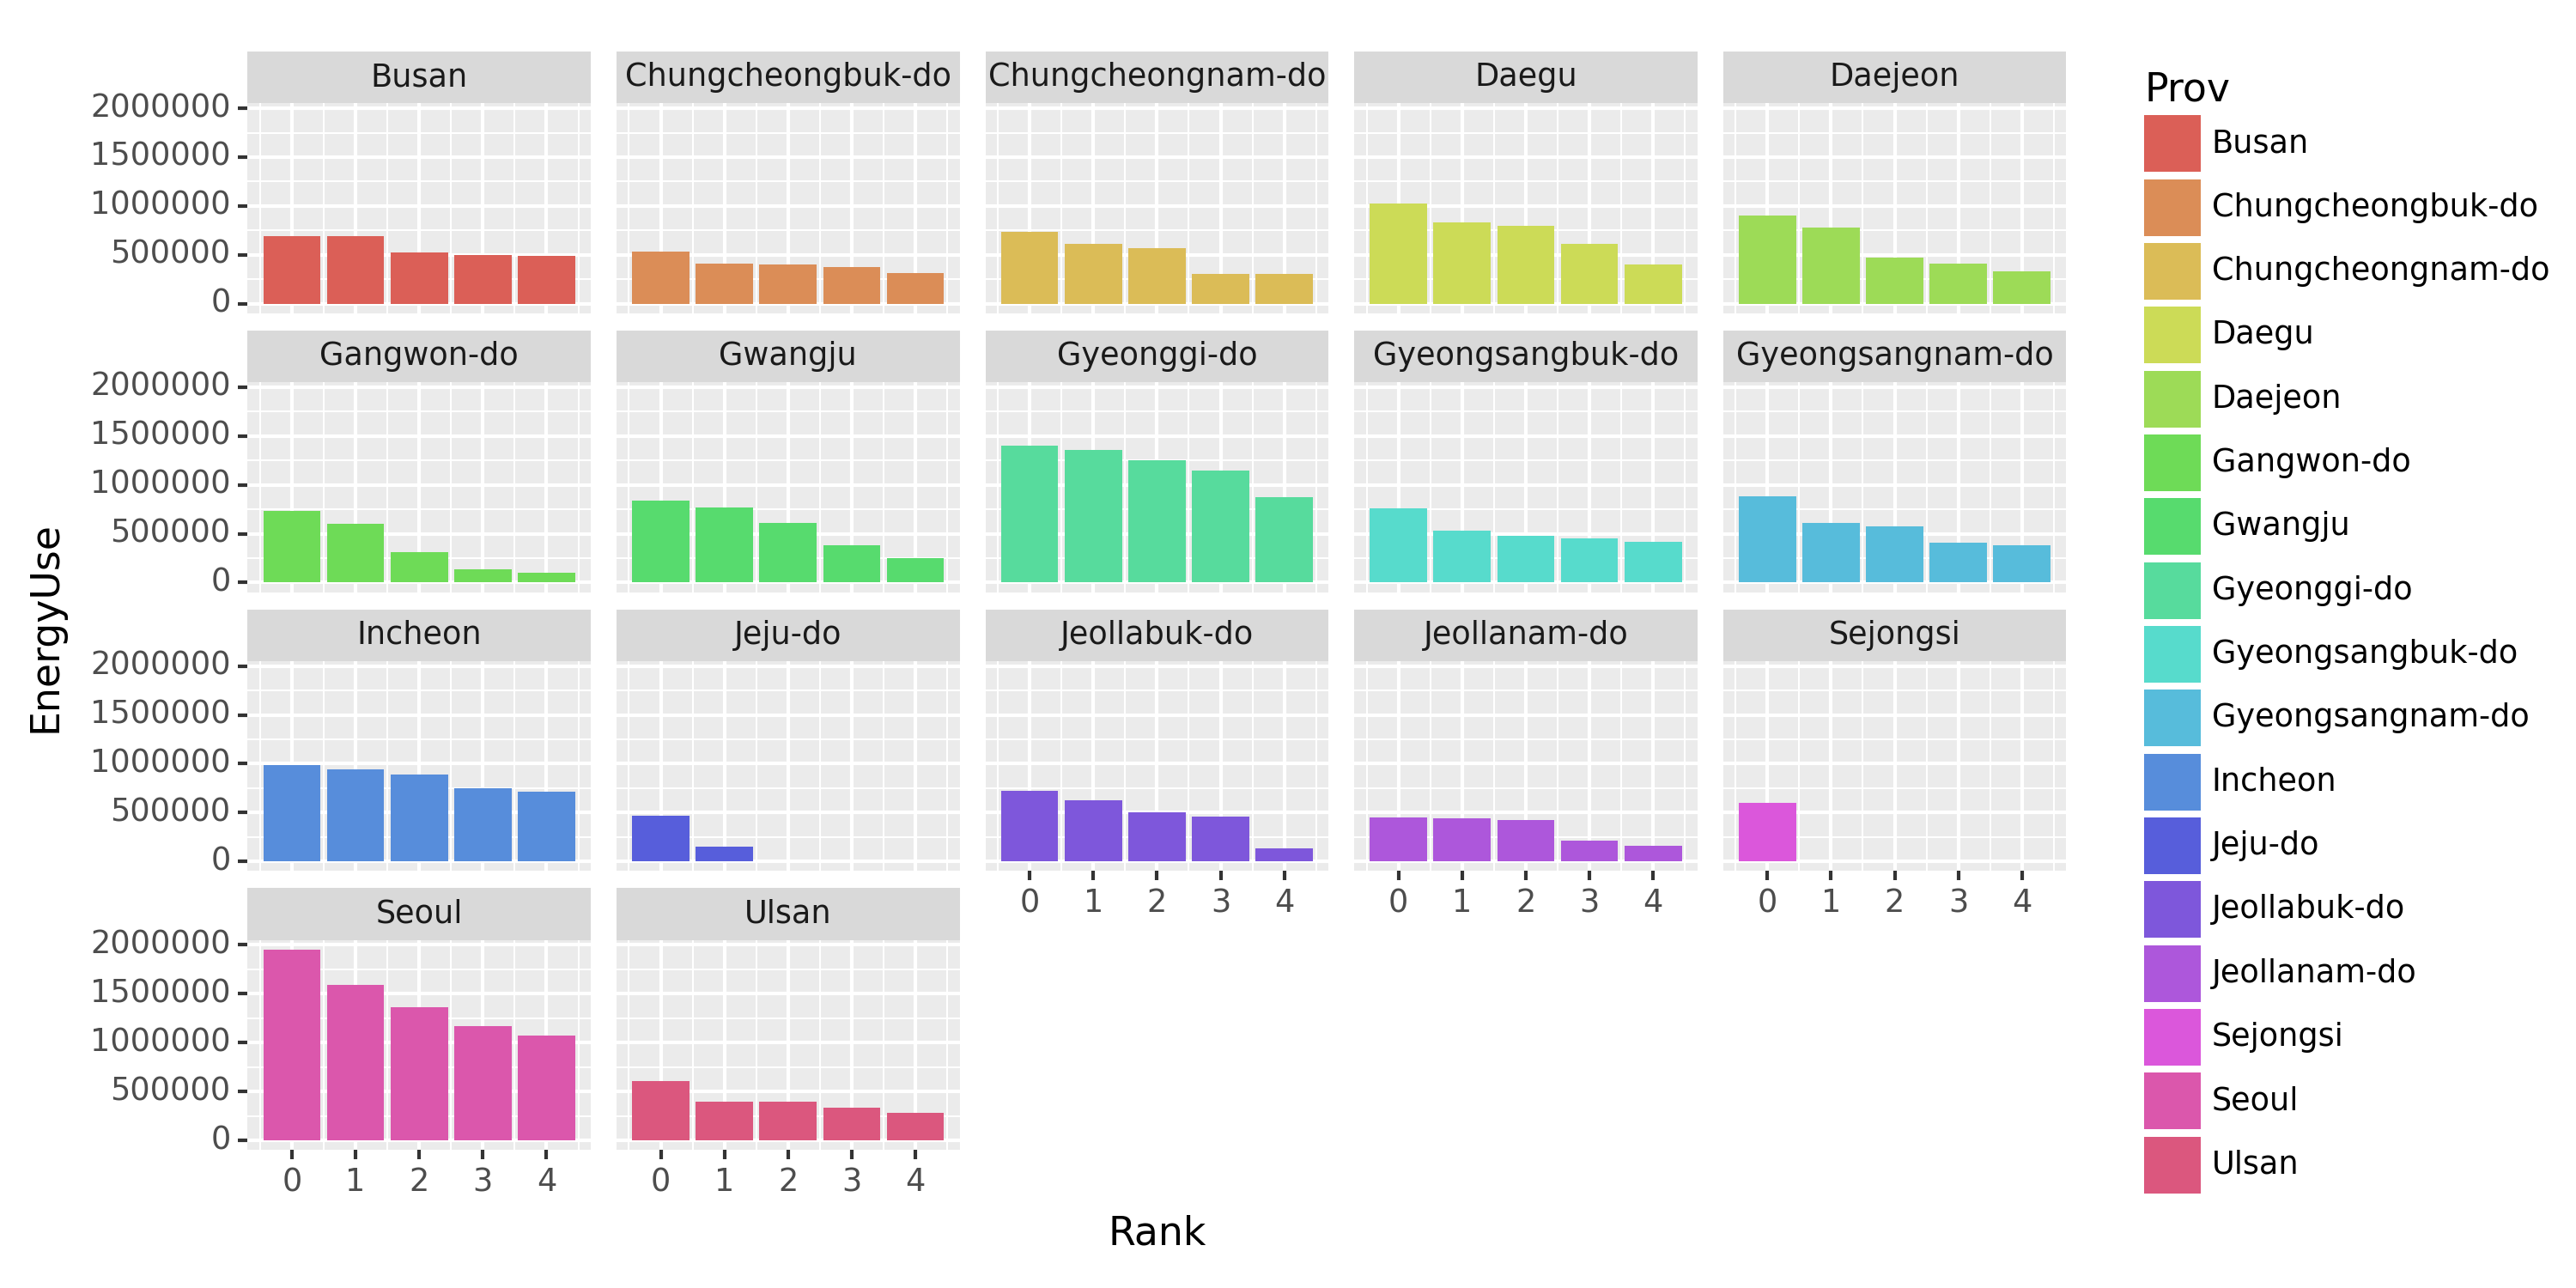

In [215]:
tidydata = pd.concat([df.sort_values('EnergyUse',ascending=False).reset_index(drop=True).reset_index().rename({'index':'Rank'},axis=1).iloc[:5,:] for k,df in g])\
.reset_index(drop=True)
tidydata 
#---# 
fig = (ggplot(tidydata) + geom_col(aes(x='Rank',y='EnergyUse',fill='Prov')) + facet_wrap('Prov')).draw()
fig.set_size_inches(10,5)
fig.set_dpi(150)
fig

`(5)` (`Prov`,`Year`)별 전기에너지 사용량 비율을 구하고 아래와 같이
시각화 하라. + 제주를 제외한 지역으로 한정하고 시각화하라.

In [364]:
# 시각화예시

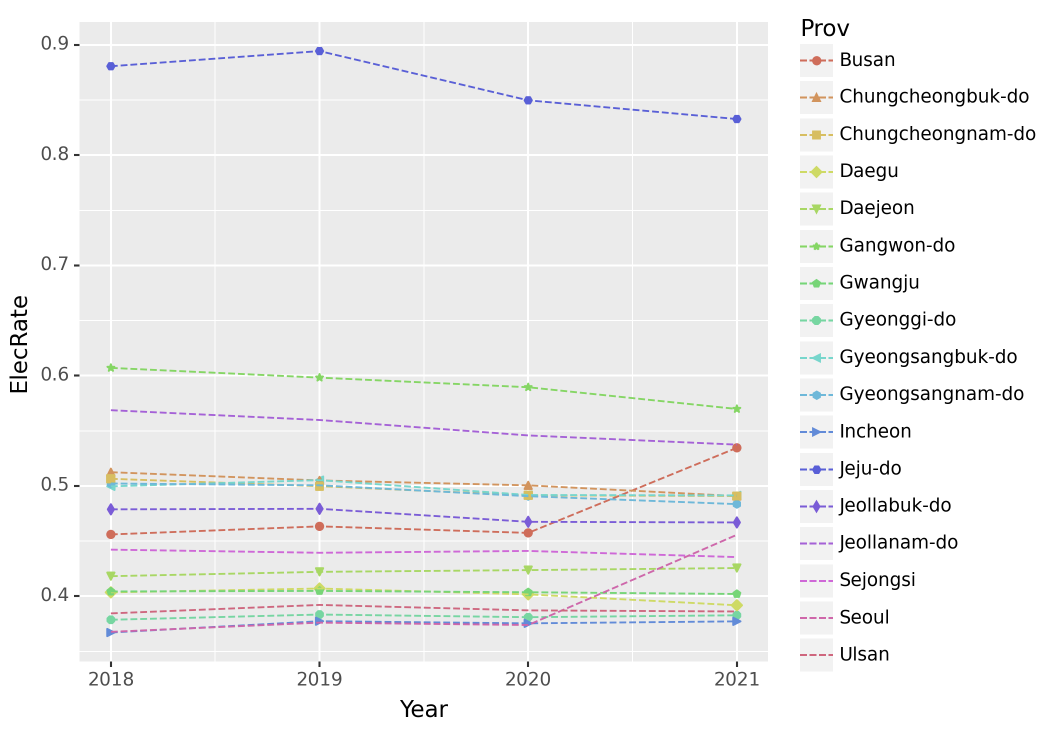

(풀이)

In [233]:
df.assign(년도 = df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index().rename(name_dict,axis=1)\
.drop(['BldgCount','Area'],axis=1).melt(id_vars=['Year','Prov','Reg'])\
.rename({'variable':'Type','value':'EnergyUse'},axis=1)\
.pivot_table(index=['Prov','Year'],columns='Type',values='EnergyUse',aggfunc='sum')\
.eval('ElecRate = Elec/(Elec+Gas+Heat)').loc[:,'ElecRate'].reset_index()

/tmp/ipykernel_3461069/3362619229.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipykernel_3461069/3057913787.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 16 rows containing missing values.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/guides/guides.py:259: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.

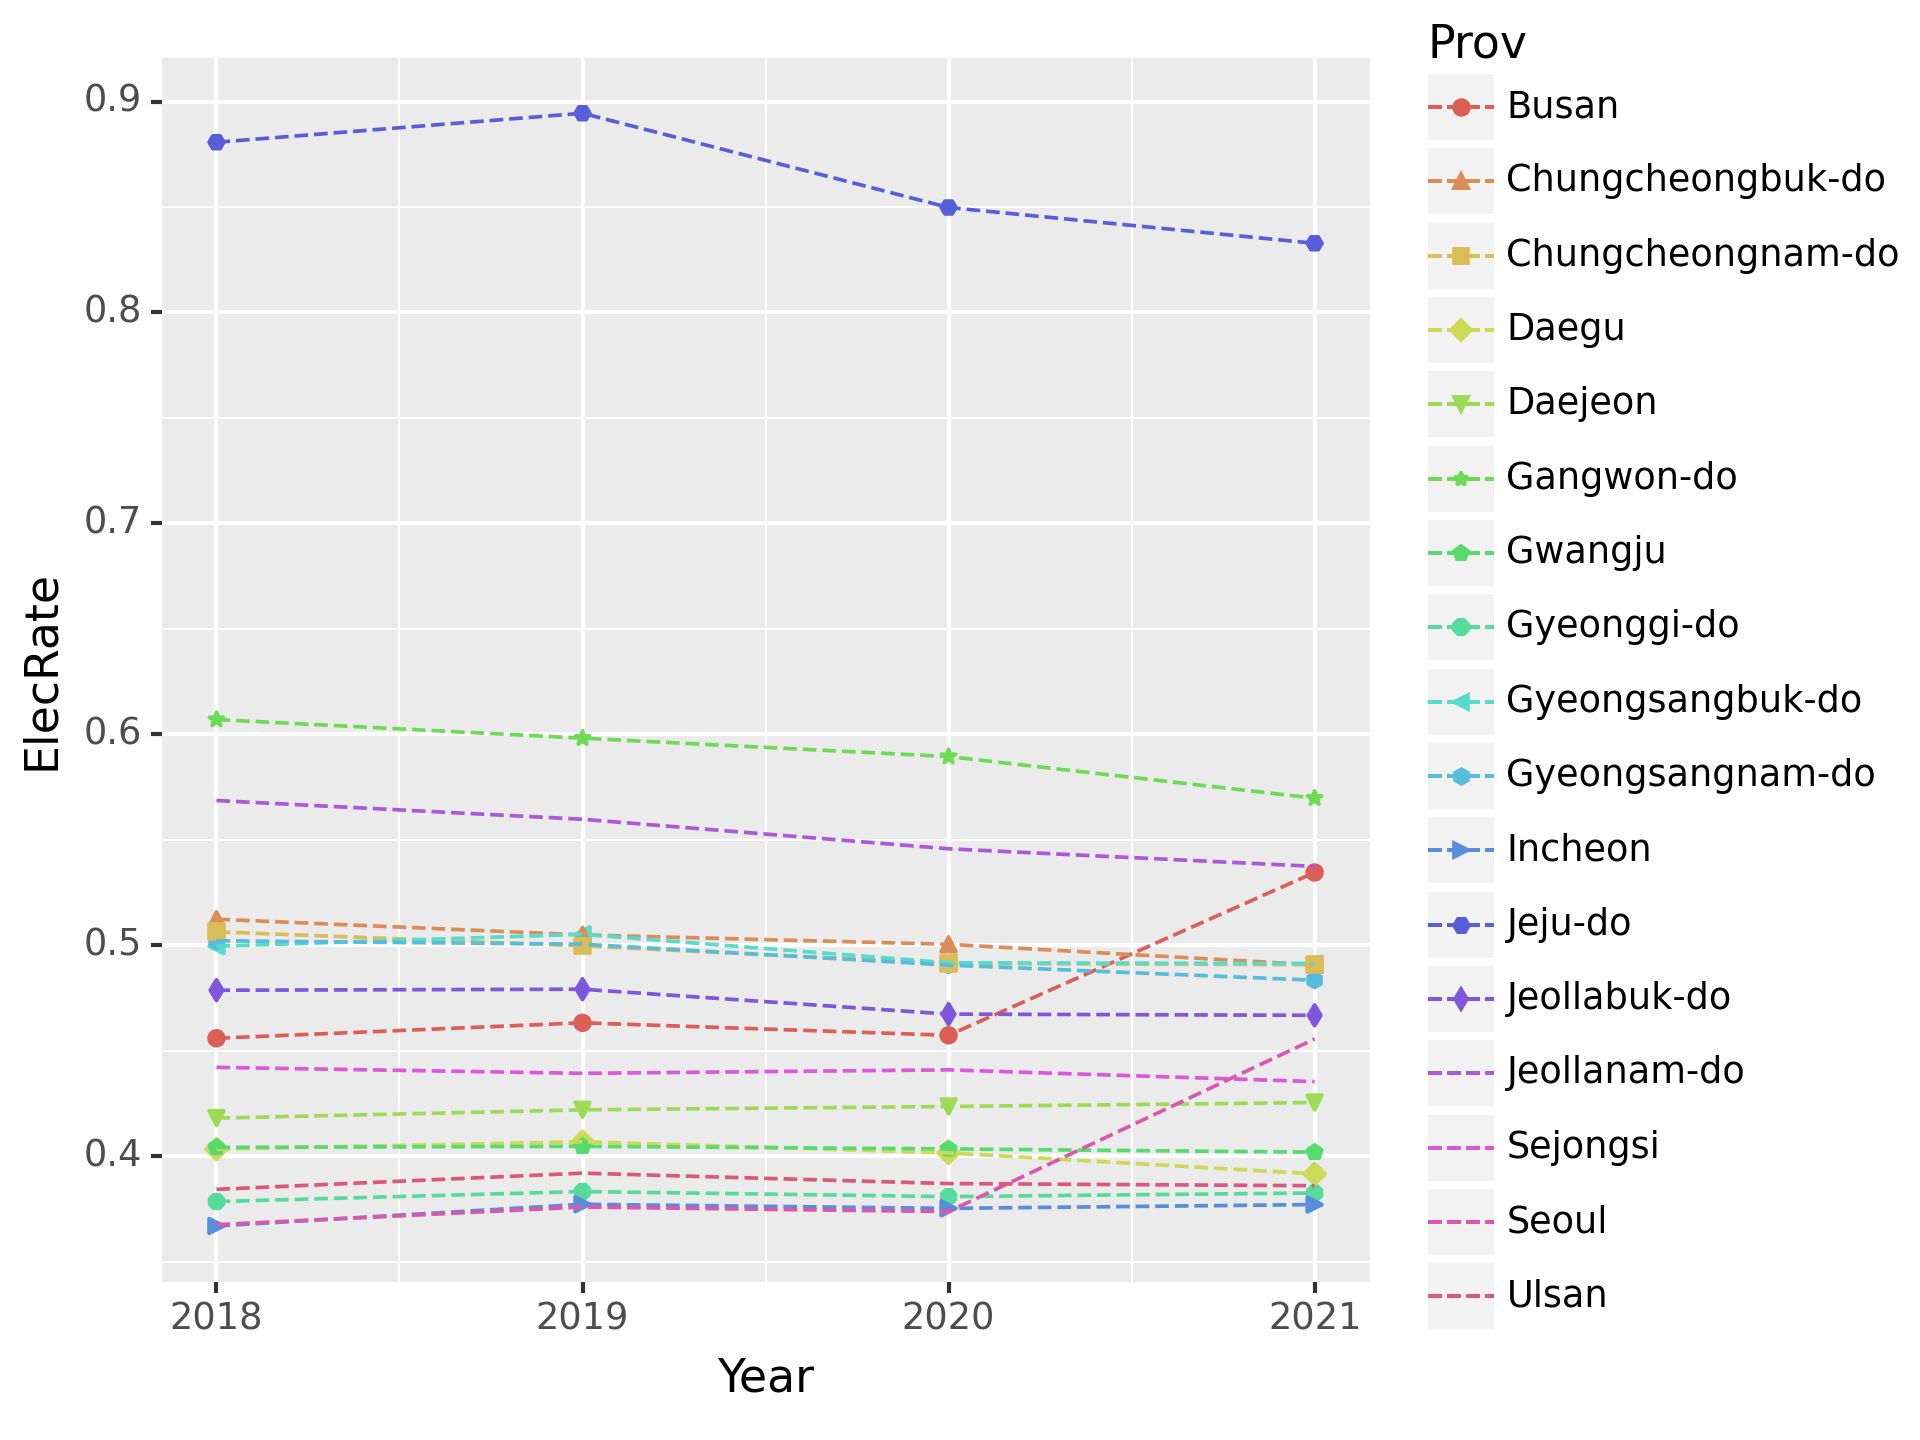

In [244]:
tidydata = df.assign(년도 = df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index().rename(name_dict,axis=1)\
.drop(['BldgCount','Area'],axis=1).melt(id_vars=['Year','Prov','Reg'])\
.rename({'variable':'Type','value':'EnergyUse'},axis=1)\
.pivot_table(index=['Prov','Year'],columns='Type',values='EnergyUse',aggfunc='sum')\
.eval('ElecRate = Elec/(Elec+Gas+Heat)').loc[:,'ElecRate'].reset_index()
#--#
fig = ggplot(tidydata)
point = geom_point(aes(x='Year',y='ElecRate',color='Prov',shape='Prov'))
line = geom_line(aes(x='Year',y='ElecRate',color='Prov'),linetype='dashed')
fig = (fig + point + line).draw()
fig.set_dpi(150)
fig

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 16 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 16 values requested.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/guides/guides.py:259: PlotnineWarning: geom_point legend : Removed 3 rows containing missing values.

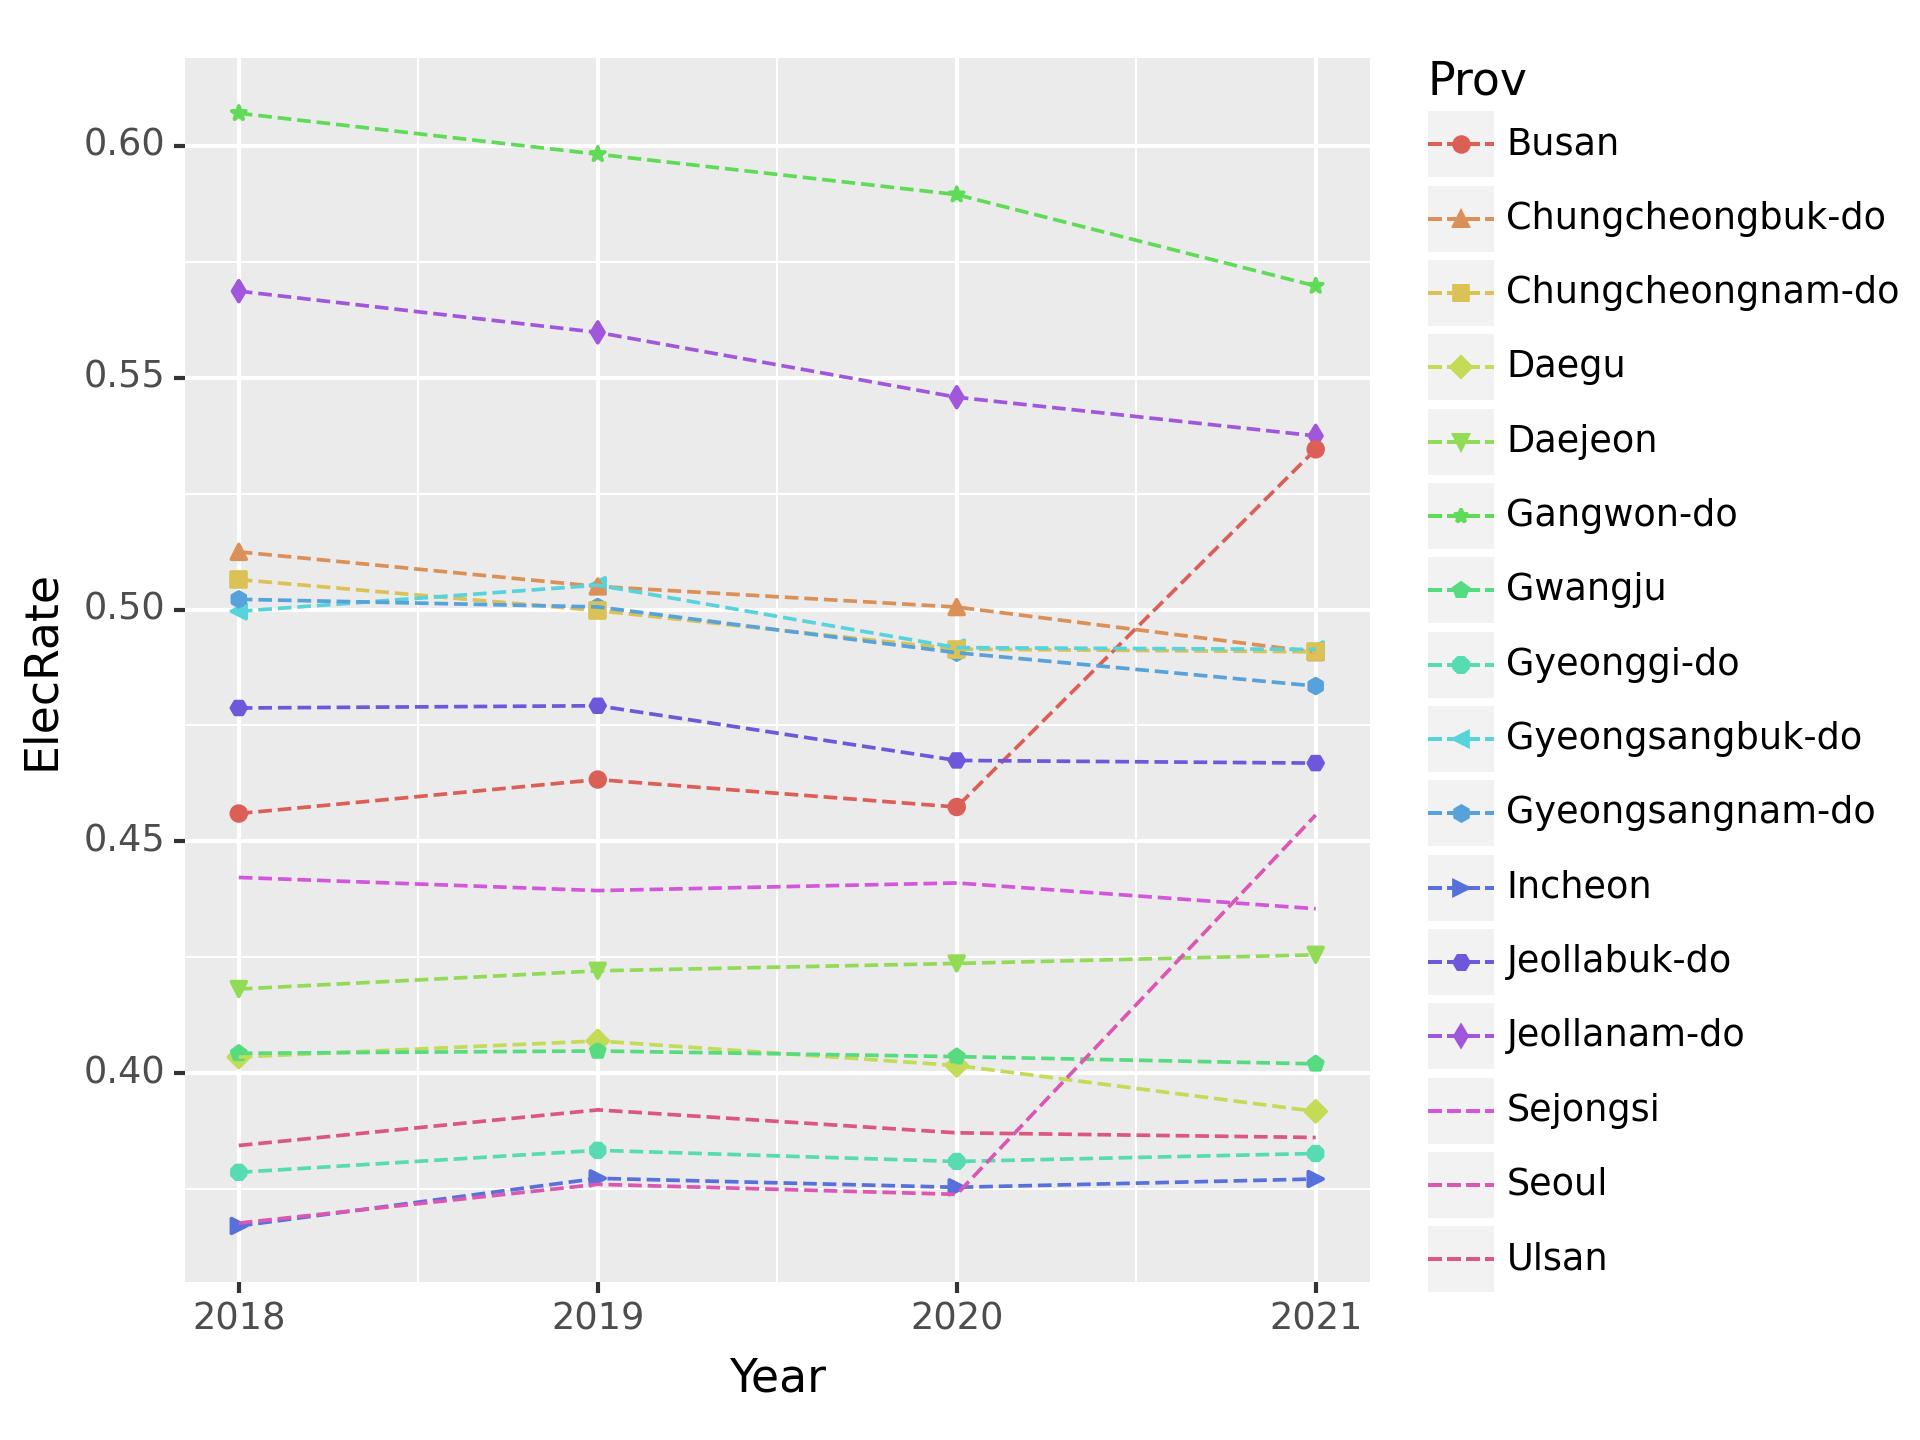

In [247]:
fig = ggplot(tidydata.query("Prov != 'Jeju-do'"))
point = geom_point(aes(x='Year',y='ElecRate',color='Prov',shape='Prov'))
line = geom_line(aes(x='Year',y='ElecRate',color='Prov'),linetype='dashed')
fig = (fig + point + line).draw()
fig.set_dpi(150)
fig

# 5. `pd.merge()` 의 이용

`before`에서 `after`로 가는 일반적인 방법이 있을까?

In [249]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)
df

In [250]:
before = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)
after = before\
    .melt(id_vars=['Year','Prov','Reg']).rename({'variable':'Type','value':'EnergyUse'},axis=1)\
    .pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum').reset_index()\
    .set_index(['Year','Prov','Type']).unstack()\
    .assign(ElecRate = lambda df: df[('EnergyUse','Elec')]/(df[('EnergyUse','Elec')]+df[('EnergyUse','Gas')]+df[('EnergyUse','Heat')]))\
    .iloc[:,-1].reset_index().set_axis(['Year','Prov','ElecRate'],axis=1)
display('before',before)
display('after',after)

/tmp/ipykernel_3461069/2643872.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

(해법) – 머리가 안돌아가면 일단 tidydata로 만들고 시작..

In [266]:
small = before.melt(id_vars=['Year','Prov','Reg'])\
.groupby(['Year','Prov']).agg({'value':'sum'}).reset_index()\
.rename({'value':'EnergyUseTotal'},axis=1)

In [267]:
big = before.melt(id_vars=['Year','Prov','Reg'])\
.groupby(['Year','Prov','variable']).agg({'value':'sum'}).reset_index()\
.rename({'variable':'Type','value':'EnergyUse'},axis=1)

In [273]:
big.merge(small).query('Type=="Elec"')\
.eval('ElecRate = EnergyUse/EnergyUseTotal')\
.loc[:,['Year','Prov','ElecRate']].reset_index(drop=True)